### **4.3 앙상블 학습**
    여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

    일반적으로 단일 ML 알고리즘보다 신뢰성이 높은 예측값을 얻을 수 있음

    # 앙상블 학습의 유형
    1) 보팅 Voting
    : 동일한 데이터 셋에 대하여 서로 다른 알고리즘을 가진 여러 분류기가 학습을 수행.  투표를 통해 최종 예측 결과를 결정

    2) 배깅 Bagging
    : 데이터 샘플링을 서로 다르게 가져가면서 (부트스트래밍 분할 방식),
    같은 유형의 알고리즘 기반의 여러 분류기가  투표를 통해 최종 에측 결과를 결정
    
    3) 부스팅 Boosting
    : 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 예측이 틀린 데이터에 대해서는
    올바르게 예측할 수 있도록 다음 분류기에는 가중치를 부여하면서 학습과 예측을 진행
    ex. 그래디언트 부스트, XGBoost, LightGBM

    4) 스태킹 Staacking
    : 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측

> 보팅 -> VotingClassifier

    - 하드 보팅: 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
    - 소프트 보팅: 분류기들의 레이블 값 결정 확률을 평균내어 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정
    
    소프트 보팅이 일반적으로 예측 성능이 더 좋음 !

In [84]:
 ## 위스콘신 유방암 데이터 세트 예측 분석
 # 유방암의 악성종양, 양성종양 여부를 결정하느 이진 분류 데이터 세트
 # 종양의 크기, 모양 등 형태와 관련한 피처

In [85]:
# 로지스틱 회귀, KNN 기반 소프트 보팅 방식의 보팅 분류기
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [86]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.956140
LogisticRegression 정확도: 0.947368
KNeighborsClassifier 정확도: 0.938596


In [87]:
# 보팅으로 여러 개의 기반 분류기를 결합한다고 무조건 기반 분류기보다 예측 성능이 향상되지는 않지만,
# 전반적으로 다른 단일 ML 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많다 !

# 다양한 변수와 예측이 어려운 규칙에 대한 '높은 유연성'을 가지고 있기 때문

### **4.4 랜덤 포레스트**
    - 대표적인 배깅 (Bagging) 알고리즘
    - 결정 트리를 기반 알고리즘으로 사용
    - 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링 된 데이터 세트 > 부트스트래핑
    - 샘플링된 서브세트의 데이터 건수는 전체 데이터 건수와 동일

    RandomForestClassifier 클래스

> 데이터 로딩

In [88]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [89]:
import pandas as pd

def get_human_dataset():
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/content/features.txt', sep='\s+',
                                  header=None, names=['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('/content/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('/content/X_test.txt', sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('/content/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/content/y_test.txt', sep='\s+', header=None, names=['action'])

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [91]:
# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 데이터 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.919579


> 랜덤 포레스트 하이퍼 파라미터 및 튜닝

    # 트리 기반의 앙상블 알고리즘의 단점
    1) 하이퍼 파라미터가 너무 많다
    2) 튜닝 시간이 오래 걸린다
    3) 그럼에도 예측 성능이 크게 향상되는 경우는 드물다

In [92]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [8,16,24],
          'min_samples_leaf' : [1,6,12],
          'min_samples_split' : [2,8,16]}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.916485


    최적 하이퍼 파라미터: {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
    최고 예측 정확도: 0.916485

In [93]:
# 최적 하이퍼 파라미터로 RandomForestClassifier 재학습
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16,
                                min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.926026


> 각 피처의 중요도를 feature_importances_로 확인

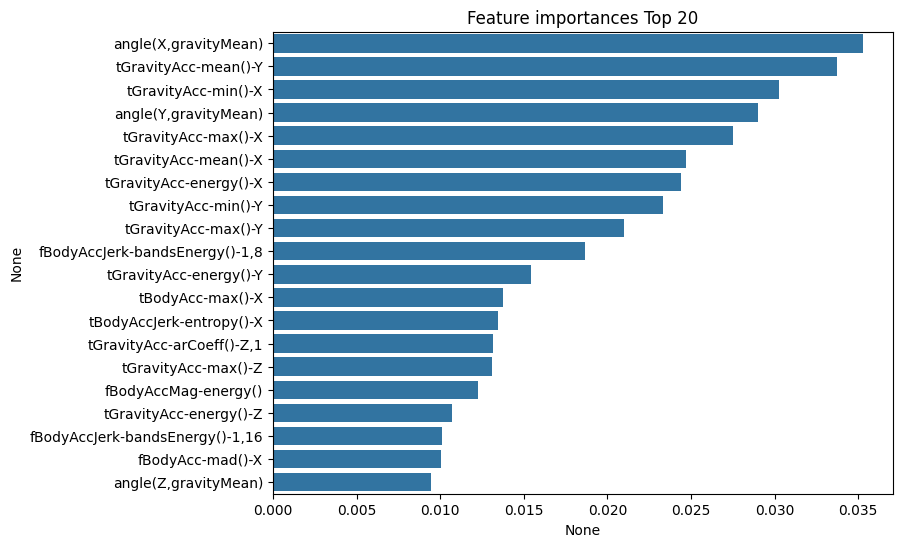

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_value = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_value, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### **4.5 GBM (Gradient Boosting Machine)**
    # 대표적인 부스팅 알고리즘
    1) AdaBoost (Adaptive boosting)
    
    2) 그래디언트 부스트 (GBM)
    : 경사하강법으로 가중치 업데이트
    GradientBoostingClassifier 클래스

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

In [96]:
X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위해 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(X_test, gb_pred)

print('GBM 정확도: {0:4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}'.format(time.time()-start_time))
# 시간이 너무 오래 걸리는 관계로 실행 중단

KeyboardInterrupt: 

In [97]:
# 일반적으로 GBM이 랜덤 포레스트보다 예측 성능이 조금 뛰어난 경우가 많다
# 하지만, 수행 시간이 오래 걸리고 하이퍼 파라미터의 튜닝 노력도 더 필요하다

> GBM 하이퍼 파라미터

    - loss: 경사하강법에서 사용할 비용함수 지정, 디폴트 deviance
    - learning_rate: 학습률
    - n_estimators: weak learner의 개수, 디폴트 100
    - subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율

### **4.6 XGBoost (eXtra Gradient Boost)**
    GBM에 기반하고 있지만,
    GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제를 해결해 매우 각광을 받고 있다

    1. 뛰어난 예측 성능
    2. GBM 대비 빠른 수행 시간
    3. 과적합 규제 (Regularization)
    4. Tree pruning (나무 가지치기)
    5. 자체 내장된 교차 검증
    6. 결손값 자체 처리

    - 파이썬 래퍼 XGBoost 모듈: 초기의 독자적인 XGBoost 프레임워크 기반의 XGBoost
    - 사이킷런 래퍼 XGBoost 모듈: 사이킷런과 연동되는 모듈

In [125]:
import xgboost as xgb
from xgboost import XGBClassifier

> **파이썬 래퍼 XGBoost 하이퍼 파라미터**

    # 주요 일반 파라미터
    - booster: gbtree(tree based model, 디폴트) 또는 gblinear(linear model) 선택
    - silent: 출력 메시지를 나타내고 싶지 않을 경우 1로 설정, 디폴트 0
    - nthread: CPU의 실행 스레드 개수, 디폴트 CPU의 전체 스레드 사용

    # 주요 부스터 파라미터
    - eta [default=0.3, alias: learning_rate]: GBM의 학습률과 같은 파라미터, 보통 0.01 ~ 0.2 사용
    - num_boost_rounds: GBM의 n_estimators와 같은 파라미터
    - min_child_weight[defualt=1]: 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합 (과적합 조절)
    - gamma [default=0, alias: min_split_loss]: 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값 (과적합 조절)
    - max_depth [default=6]: 보통 3~10 사용
    - sub_sample[default=1]: GBM의 subsample과 동일
    -  colsample_bytree[default=1]: GBM의 max_features와 유사, 트리 생성에 필요한 피처를 임의로 샘플링 (과적합 조절)
    - lambda [default=1, alias: reg_lambda]: L2 Regularization 적용 값 (과적합 조절)
    - alpha [default=0, alias: reg_alpha]: L1 Regularization 적용 값 (과적합 조절)
    - scale_pos_weight [default=1]: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터

    # 학습 태스크 파라미터
    - objective: 최솟값을 가져야 할 손실 함수를 정의
    - binary:logistic: 이진 분류일 때 적용
    - multi:softmax: 다중 분류일 때 적용
    - multi:softprob: multi:softmax와 유사하나, 개별 레이블 클래스의 해당되는 예측 확률을 반환
    - eval_metric: 검증에 사용되는 함수 정의, 디폴트 회귀(rmse), 분류(error)
                   rmse(Root MSE) / mae(Mean Absolute Error) / logloss(Negative log likelihood) /
                   error (Binary classification error rate) / merror(Multiclass classification error rate) /
                   mlogloss(Multiclass logloss) / auc(Area under the curve)

> 과적합 방지를 위해

    - eta 값을 낮춘다 (반대로 num_round / n_estimators는 높인다)
    - max_depth 값을 낮춘다
    - min_child_weight 값을 높인다
    - gamma 값을 높인다
    - subsample, colsample_bytree 조정한다.

> XGBoost의 조기 중단(Early Stopping) 기능

    n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도
    예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간을 개선

> 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

> 악성종양(0), 양성종양(1) 이진분류

In [126]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [127]:
dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [128]:
# 레이블 값 분포 확인
print(dataset.target_names)
print(cancer_df.target.value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [129]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.target

# 전체 데이터 중 80% 학습용 데이터, 20% 테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10% 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [130]:
# 파이썬 래퍼 XGBoost는 XGBoost만의 전용 데이터 객체인 DMatirx를 사용하므로 Numpy 또는 Pandas로 되어 있는 학습, 검증, 테스트용 데이터 세트를 모두 DMatirx로 생성하여 모델에 입력해 주어야 함!

In [131]:
# 학습, 검증, 테스트용 DMatirx를 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [132]:
# 하이퍼 파라미터 설정
params = {'max_depth':3,
          'eta':0.05,
          'objective':'binary:logistic',
          'eval_metirc':'logloss'}
num_rounds=400

In [133]:
# 파이썬 래퍼 XGBoost는 xgboost 모듈의 train() 함수에 하이퍼 파라미터를 전달
# 조기 중단의 성능 평가는 주로 별도의 검증 데이터 세트를 이용해 더 이상 지표 개선이 없을 경우 num_boost_round 횟수를 모두 채우지 않고 중간에 반복을 빠져 나올 수 있도록 함
# 이때, train() 함수에 early_stopping_rounds 파라미터를 입력하여 조기 중단할 수 있는 최소 반복 횟수 설정 가능
# 성능 평가를 위한 지표를 eval_metirc으로 설정해야 함

In [134]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기합니다.
eval_list = [(dtr, 'train'), (dval, 'eval')] # 또는 eval_list = [(dval, 'eval')]만 명기해도 무방

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달하여 학습
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, \
                      early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.62480	eval-logloss:0.63104
[1]	train-logloss:0.58674	eval-logloss:0.60478
[2]	train-logloss:0.55226	eval-logloss:0.58223
[3]	train-logloss:0.52086	eval-logloss:0.56184
[4]	train-logloss:0.49192	eval-logloss:0.54118
[5]	train-logloss:0.46537	eval-logloss:0.52223
[6]	train-logloss:0.44029	eval-logloss:0.50287
[7]	train-logloss:0.41666	eval-logloss:0.48620
[8]	train-logloss:0.39525	eval-logloss:0.46974
[9]	train-logloss:0.37542	eval-logloss:0.45497
[10]	train-logloss:0.35701	eval-logloss:0.44131
[11]	train-logloss:0.33982	eval-logloss:0.43134
[12]	train-logloss:0.32297	eval-logloss:0.41972
[13]	train-logloss:0.30725	eval-logloss:0.40902
[14]	train-logloss:0.29327	eval-logloss:0.39883
[15]	train-logloss:0.27946	eval-logloss:0.38968
[16]	train-logloss:0.26691	eval-logloss:0.38150
[17]	train-logloss:0.25473	eval-logloss:0.37368
[18]	train-logloss:0.24385	eval-logloss:0.36666
[19]	train-logloss:0.23338	eval-logloss:0.35994
[20]	train-logloss:0.22320	eval-logloss:0.35374
[2

In [135]:
# 201번째 반복에서 0.23533로 가장 낮고, 이후 251번째 반복까지 성능이 향상되지 않았으므로 조기 중단되었다.

In [136]:
# 예측 수행
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.75  0.049 0.98  1.    0.999 0.999 0.998 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [137]:
# get_clf_eval() 함수를 이용해 XGBoost 모델의 예측 성능 평가

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)

    print('정확도: {0:4f}, 정밀도: {1:4f}, 재현율: {2:4f}, \
        F1: {3:4f}, AUC: {4:4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [139]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.964912, 정밀도: 0.974026, 재현율: 0.974026,         F1: 0.974026, AUC: 0.996490


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

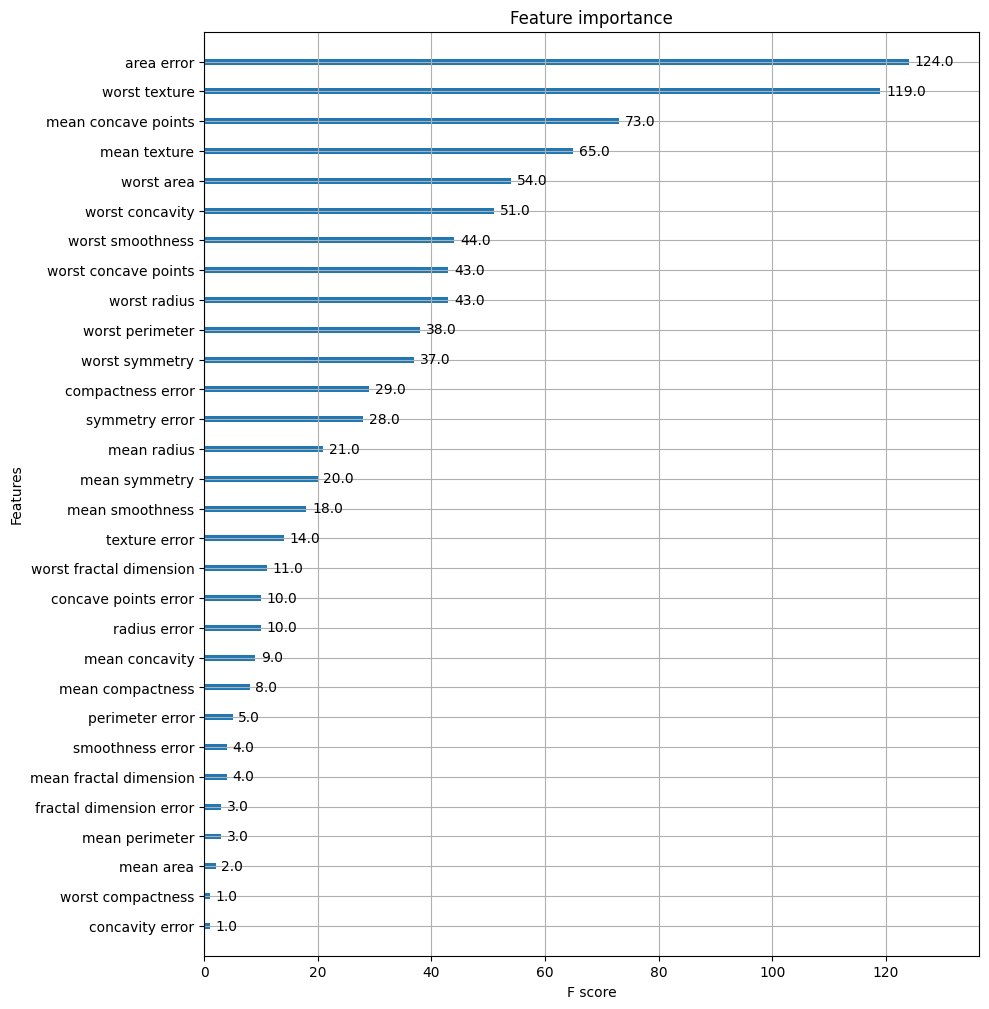

In [140]:
# xgboost 패키지에 내장된 시각화 기능을 통해 피처 중요도 확인
# f 스코어를 기반으로 해당 피처의 중요도를 나타냄 > 해당 피처가 트리 분할 시 얼마나 자주 사용되었는지를 지표로 나타낸 값
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [141]:
# 파이썬 래퍼 XGBoost는 사이킷런의 GridSearchCV와 유사하게 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 cv() API를 제공한다.
# xgboost.cv()

> **사이킷런 래퍼 XGBoost의 개요 및 적용**

    eta > learning_rate
    sub_sample > subsample
    lambda > reg_lambda
    alpha > reg_alpha

In [158]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metirc 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [159]:
# get_clf_eval() 함수를 이용해 사이킷런 XGBoost 모델의 예측 성능 평가
get_clf_eval(y_test, w_preds, w_preds_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.973684, 정밀도: 0.974359, 재현율: 0.987013,         F1: 0.980645, AUC: 0.995437


In [160]:
# 조기 중단을 한 파이썬 래퍼 XGBoost보다 더 좋은 평가 결과 (최종 학습 데이터 건수가 작기 때문)

In [168]:
# 사이킷런 래퍼 XGBoost에서 조기 중단 수행 > .fit(early_stopping_rounds, eval_metric, eval_set)
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss",
                eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

In [162]:
# 파이썬 래퍼의 조기 중단과 동일하게 201번째 반복에서 0.23533로 가장 낮았고 이후 250번 반복까지 더 이상 성능이 향상되지 않아 조기종료되었다.

In [163]:
# get_clf_eval() 함수를 이용해 XGBClassifier의 예측 성능 평가
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.964912, 정밀도: 0.974026, 재현율: 0.974026,         F1: 0.974026, AUC: 0.996139


In [164]:
# 조기 중단 전보다 성능이 향상되지 않았다. > 데이터 세트가 워낙 작기 때문
# 조기 중단을 위한 검증 데이터를 분리하면, 검증 데이터가 없는 학습 데이터를 사용했을 때보다 성능이 약간 저조하다.

In [165]:
# 조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 크다
# early_stopping_rounds를 10으로 설정하고 재학습.
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, eval_metric="logloss",
                eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.62480	validation_1-logloss:0.63104
[1]	validation_0-logloss:0.58674	validation_1-logloss:0.60478
[2]	validation_0-logloss:0.55226	validation_1-logloss:0.58223
[3]	validation_0-logloss:0.52086	validation_1-logloss:0.56184
[4]	validation_0-logloss:0.49192	validation_1-logloss:0.54118
[5]	validation_0-logloss:0.46537	validation_1-logloss:0.52223
[6]	validation_0-logloss:0.44029	validation_1-logloss:0.50287
[7]	validation_0-logloss:0.41666	validation_1-logloss:0.48620
[8]	validation_0-logloss:0.39525	validation_1-logloss:0.46974
[9]	validation_0-logloss:0.37542	validation_1-logloss:0.45497
[10]	validation_0-logloss:0.35701	validation_1-logloss:0.44131
[11]	validation_0-logloss:0.33982	validation_1-logloss:0.43134
[12]	validation_0-logloss:0.32297	validation_1-logloss:0.41972
[13]	validation_0-logloss:0.30725	validation_1-logloss:0.40902
[14]	validation_0-logloss:0.29327	validation_1-logloss:0.39883
[15]	validation_0-logloss:0.27946	validation_1-logloss:0.38968
[1

In [166]:
# 77번째 반복에서 가장 낮게 측정되었고 이후 86번째 반복까지 성능 평가 지표가 향상되지 못해 조기종료
# 정화도가 오히려 더 좋게 나왔다? xgboost 버전 차이 때문인가...?

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

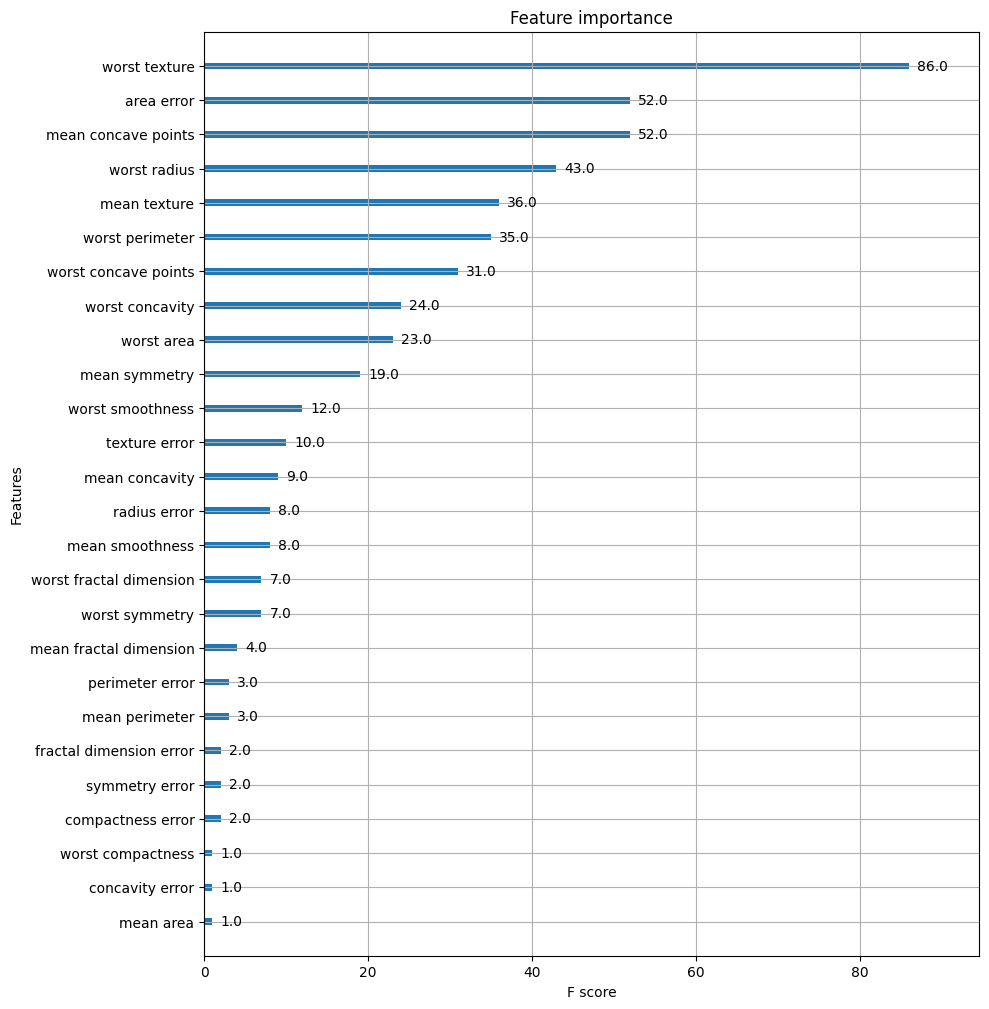

In [167]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
# 사이킷런 래퍼 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)